# ============================================
# Exploratory Data Analysis - Sales Dashboard
# ============================================


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('../data/cleaned_sales_data.csv')
print(f"✅ Data Loaded: {df.shape[0]} records, {df.shape[1]} columns")

✅ Data Loaded: 5000 records, 14 columns


In [3]:
# Set style
sns.set(style="whitegrid", palette="Set2")


In [4]:
print("\n Dataset Info:")
print(df.info())
print("\n🔹 Missing Values:\n", df.isnull().sum())

print("\n💰 Top 5 Products by Revenue:")
print(df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head())



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_ID           5000 non-null   object 
 1   Date               5000 non-null   object 
 2   Product            5000 non-null   object 
 3   Category           5000 non-null   object 
 4   Quantity           5000 non-null   int64  
 5   Sales              5000 non-null   float64
 6   Discount           5000 non-null   float64
 7   Profit             5000 non-null   float64
 8   Region             5000 non-null   object 
 9   Customer_Segment   5000 non-null   object 
 10  Revenue            5000 non-null   float64
 11  Profit Margin (%)  5000 non-null   float64
 12  Year               5000 non-null   int64  
 13  Month              5000 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB
None

🔹 Missing Values:
 Order_ID            

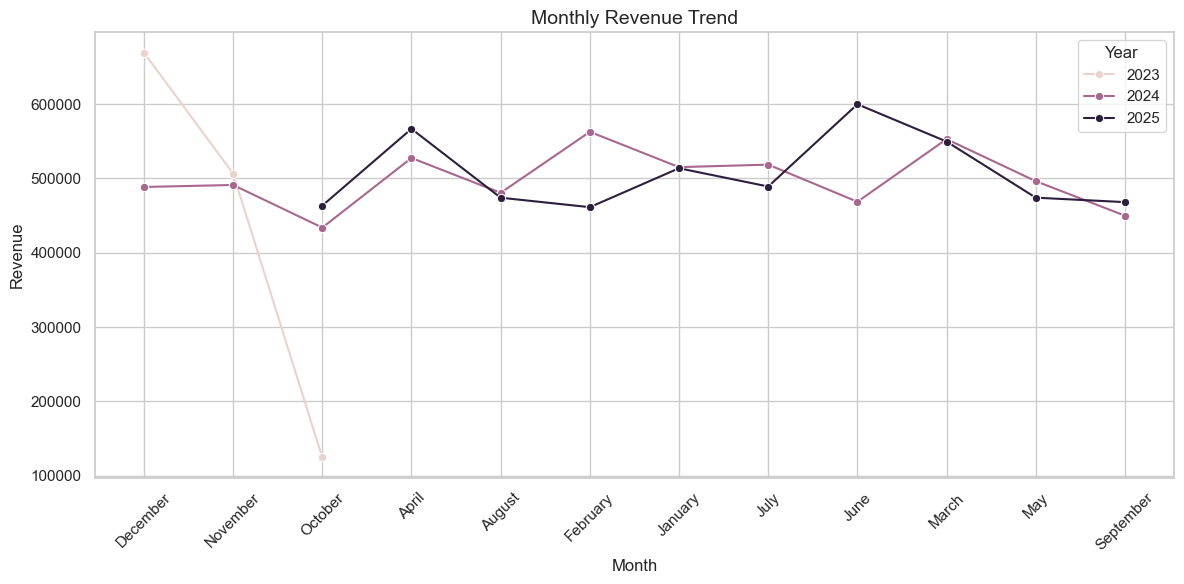

In [5]:
# 2. Monthly Sales & Profit Trend
# --------------------------------------------
monthly = df.groupby(['Year', 'Month']).agg({'Revenue':'sum', 'Profit':'sum'}).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Month', y='Revenue', hue='Year', marker='o')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visuals/monthly_revenue.png')
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4868\4100493327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Region')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False),


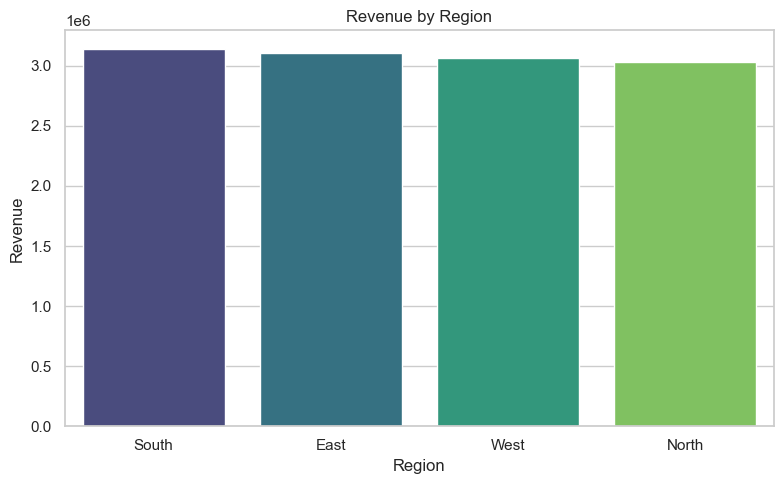

In [6]:
# --------------------------------------------
# 3. Regional Sales Performance
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('Region')['Revenue'].sum().reset_index().sort_values('Revenue', ascending=False),
            x='Region', y='Revenue', palette='viridis')
plt.title('Revenue by Region')
plt.tight_layout()
plt.savefig('../visuals/region_revenue.png')
plt.show()


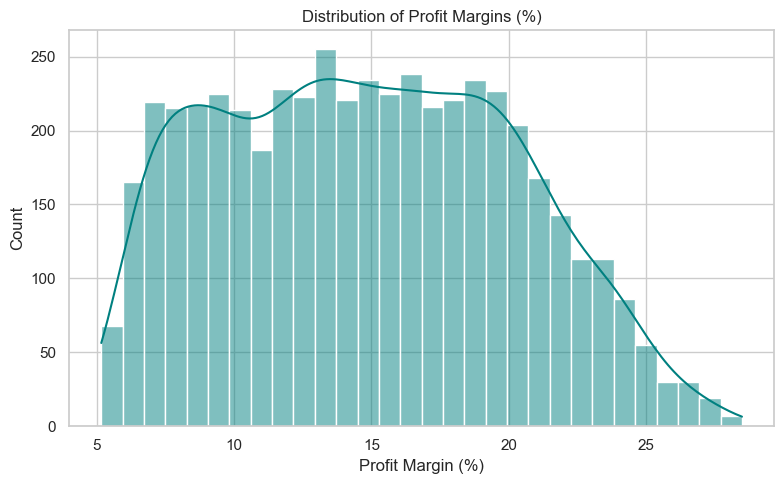

In [7]:
# --------------------------------------------
# 4. Profit Margin Distribution
# --------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(df['Profit Margin (%)'], bins=30, kde=True, color='teal')
plt.title('Distribution of Profit Margins (%)')
plt.tight_layout()
plt.savefig('../visuals/profit_margin_dist.png')
plt.show()

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_4868\3551242927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Profit', y='Product', palette='magma')


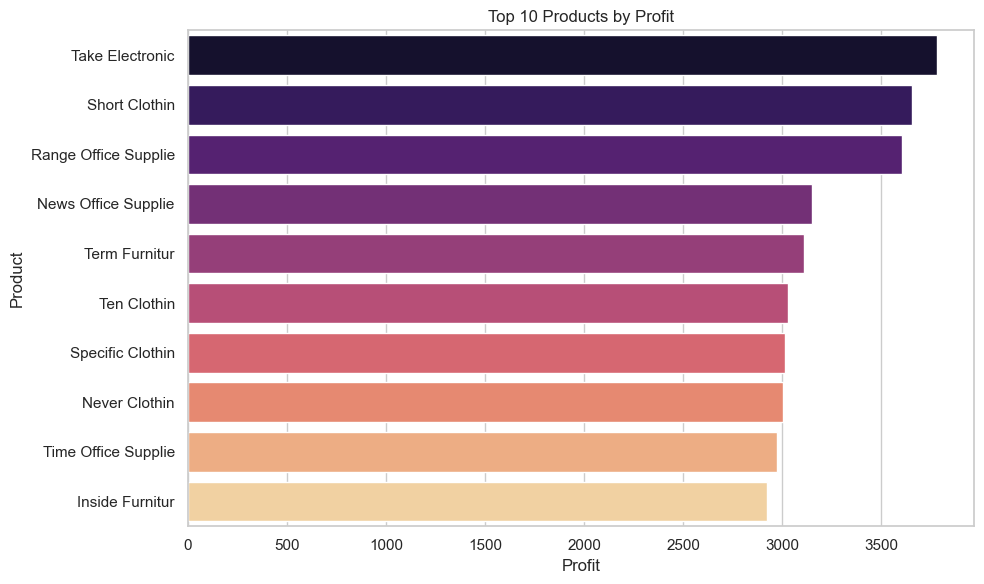

In [8]:
# --------------------------------------------
# 5. Top 10 Products by Profit
# --------------------------------------------
top_products = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='Profit', y='Product', palette='magma')
plt.title('Top 10 Products by Profit')
plt.tight_layout()
plt.savefig('../visuals/top_products.png')
plt.show()

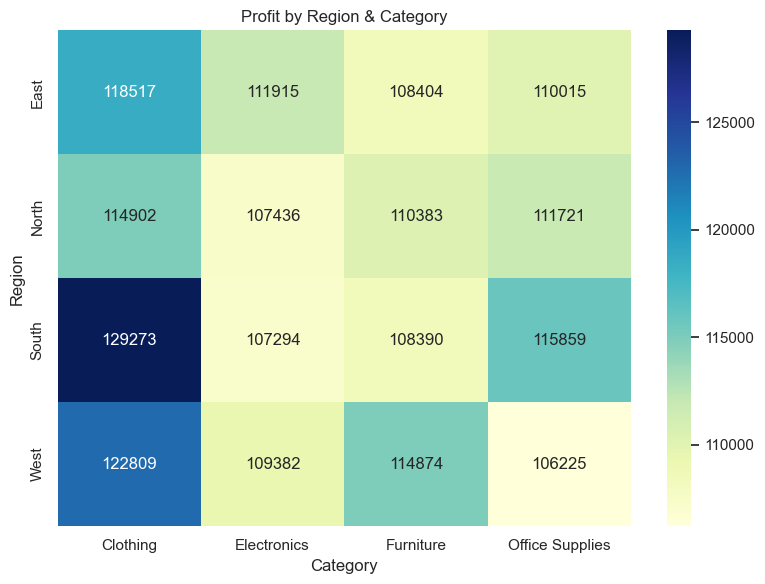

In [9]:
# --------------------------------------------
# 6. Regional Profitability Heatmap
# --------------------------------------------
region_category = df.pivot_table(values='Profit', index='Region', columns='Category', aggfunc='sum', fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(region_category, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Profit by Region & Category')
plt.tight_layout()
plt.savefig('../visuals/region_category_heatmap.png')
plt.show()

In [10]:
print("\n✅ EDA completed successfully! Visuals saved in ../visuals/")


✅ EDA completed successfully! Visuals saved in ../visuals/
